In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

In [2]:
def log_approx(input, order=2):
    """
    Taylor expansion of log function
    input - (N,C) where C = number of classes
    order - number of expansions
    """
    result = 0
    for n in range(1, order+1):
        result += (-1)**(n+1) * (input-1)**n / n
    return result

def cross_entropy_approx(input, target, order=2, reduction='mean'):
    """
    input - (N,C) where C = number of classes
    target - (N) 
    order - number of expansions
    """
    return F.nll_loss(log_approx(F.softmax(input, dim=1), order=order), target, reduction=reduction)

def brier_score_loss(input, target, reduction='mean'):
    """
    Computes the brier score: https://en.wikipedia.org/wiki/Brier_score
    Parameters
    input - (N,C) where C = number of classes
    target - (N) 
    reduction - reduction to apply to output, default: mean
    """
    num_classes = input[0].size()[0]
    target = F.one_hot(target, num_classes=num_classes)
    loss = (input - target).pow(2).sum(dim=1)
    if reduction == 'mean':
        loss = loss.mean()
    return loss

In [3]:
probs = torch.linspace(0, 1, 100)
target = torch.zeros(100, dtype=torch.long)

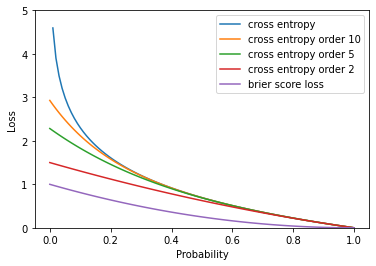

In [4]:
plt.plot(probs, F.nll_loss(torch.log(probs.unsqueeze(dim=1)), target, reduction='none'), label="cross entropy")
plt.plot(probs, F.nll_loss(log_approx(probs.unsqueeze(dim=1), order=10), target, reduction='none'), label="cross entropy order 10")
plt.plot(probs, F.nll_loss(log_approx(probs.unsqueeze(dim=1), order=5), target, reduction='none'), label="cross entropy order 5")
plt.plot(probs, F.nll_loss(log_approx(probs.unsqueeze(dim=1), order=2), target, reduction='none'), label="cross entropy order 2")
plt.plot(probs, brier_score_loss(probs.unsqueeze(dim=1), target, reduction='none'), label="brier score loss")

plt.legend(loc="upper right")
plt.ylim(0, 5.0)
plt.ylabel('Loss')
plt.xlabel('Probability')
plt.show()